In [1]:
!pip install pycocotools opencv-python matplotlib albumentations

In [2]:
pip install opencv-python matplotlib pycocotools 

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install --user albumentations==1.3.0

Note: you may need to restart the kernel to use updated packages.


In [4]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pycocotools.coco import COCO
import albumentations as A
%matplotlib inline

In [5]:
img_dir = r"C:\Users\ilaki\Desktop\VISON_AI\coco2017\val2017"
ann_file = r"C:\Users\ilaki\Desktop\VISON_AI\coco2017\annotations\instances_val2017.json"

In [6]:
coco = COCO(ann_file)
img_ids = coco.getImgIds()
print(f"Total images in COCO annotations: {len(img_ids)}")

loading annotations into memory...
Done (t=1.43s)
creating index...
index created!
Total images in COCO annotations: 5000


In [7]:
transform = A.Compose([
    A.Resize(256, 256),
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.2),
    A.RandomBrightnessContrast(p=0.3),
    A.ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.1, rotate_limit=15, p=0.3),
    A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
])


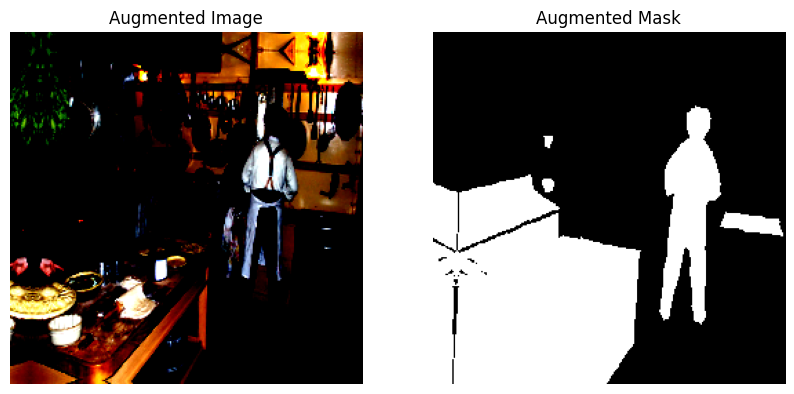

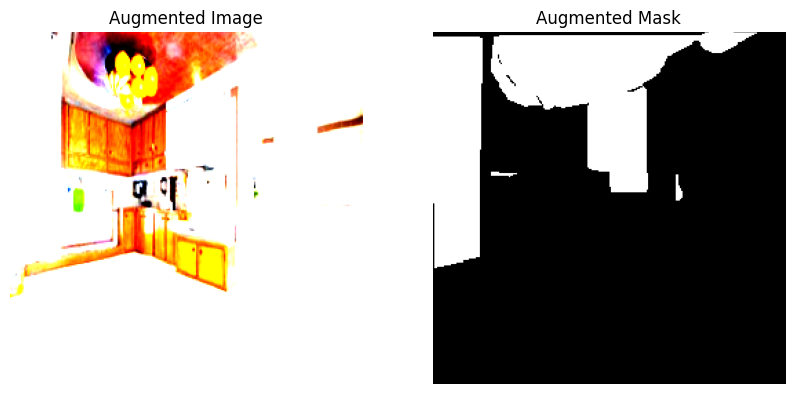

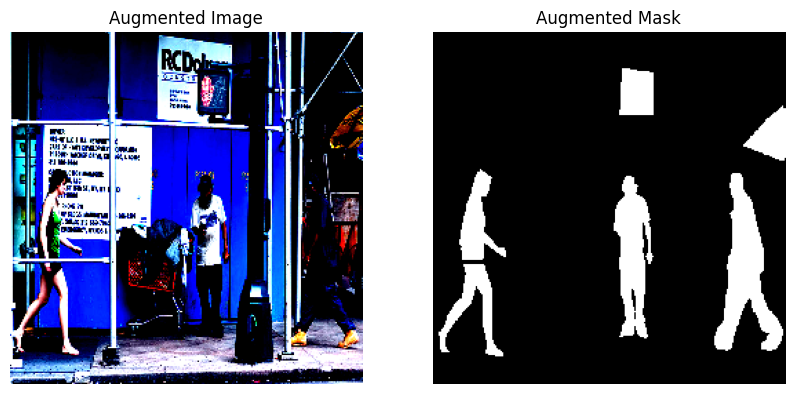

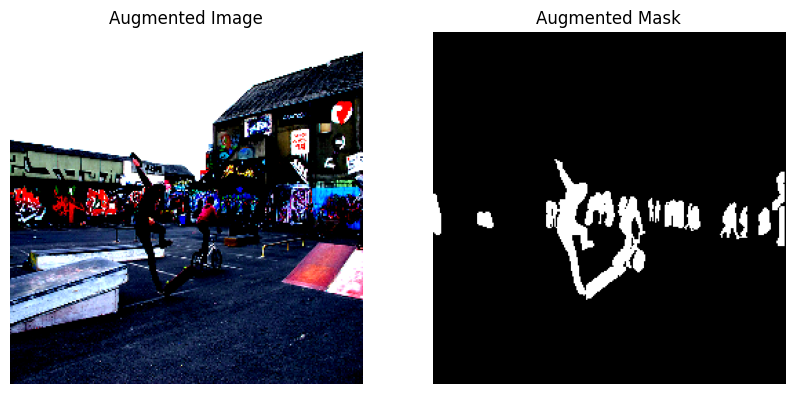

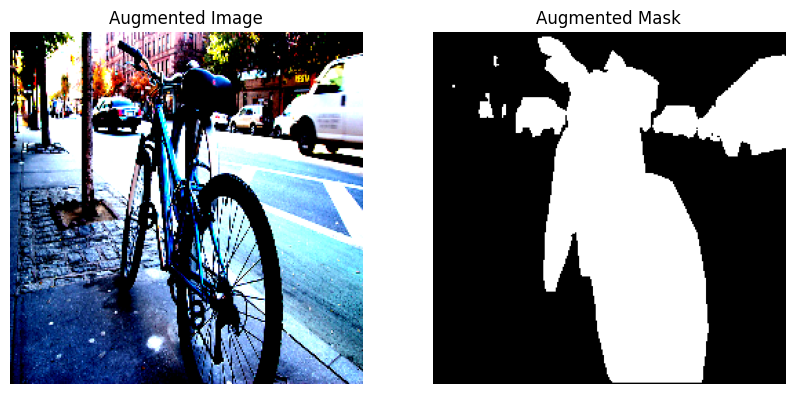

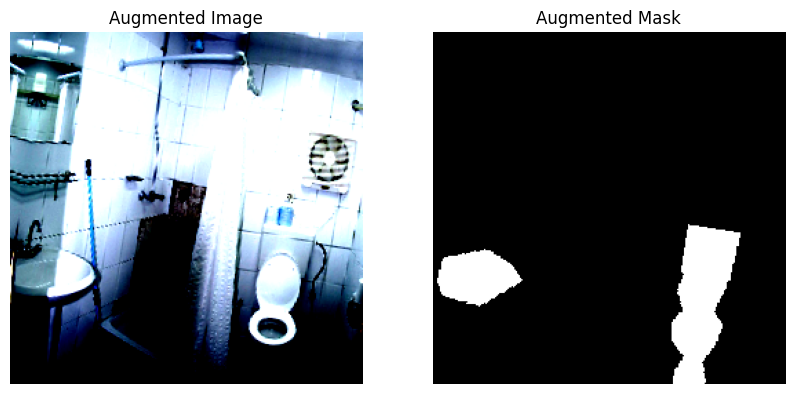

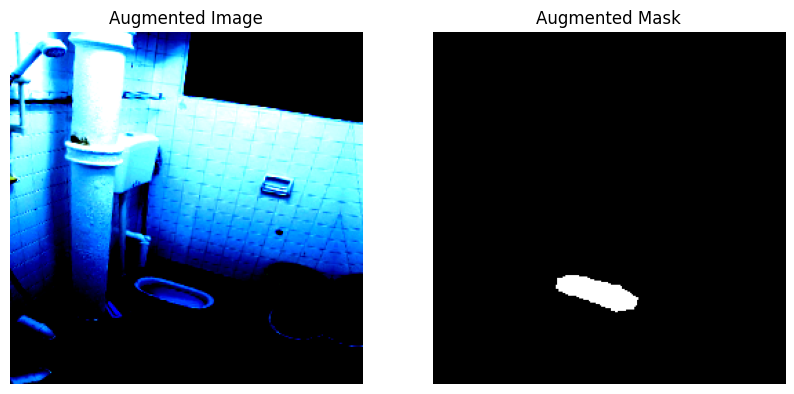

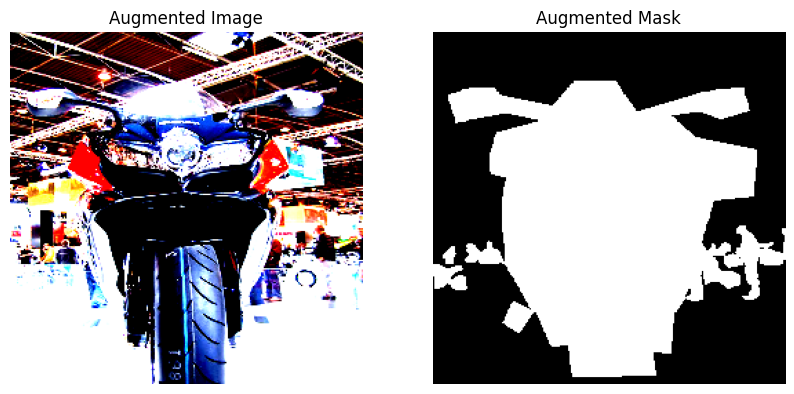

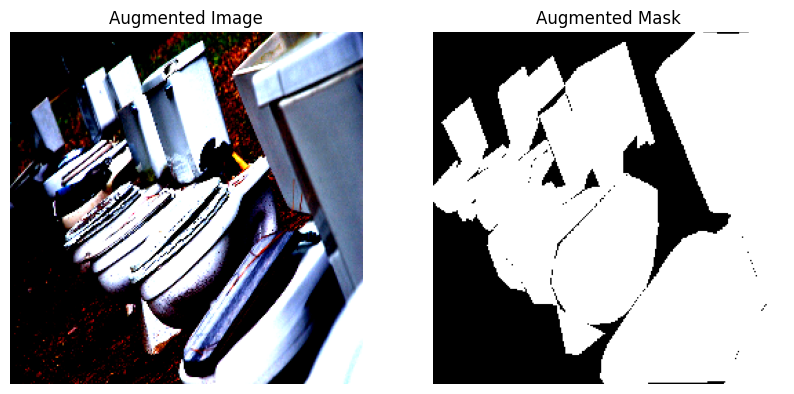

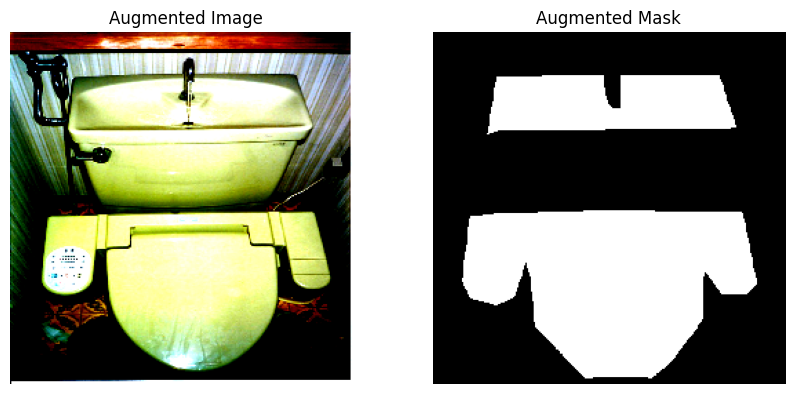

In [8]:
sample_ids = img_ids[:10]

for img_id in sample_ids:
    img_info = coco.loadImgs(img_id)[0]
    img_path = os.path.join(img_dir, img_info['file_name'])

    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    ann_ids = coco.getAnnIds(imgIds=img_id)
    anns = coco.loadAnns(ann_ids)
    mask = np.zeros((img_info['height'], img_info['width']), dtype=np.uint8)
    for ann in anns:
        mask = np.maximum(mask, coco.annToMask(ann) * 255)

    augmented = transform(image=img, mask=mask)
    aug_img, aug_mask = augmented['image'], augmented['mask']

    vis_img = np.clip((aug_img * 255), 0, 255).astype(np.uint8)

    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].imshow(vis_img)
    axs[0].set_title("Augmented Image")
    axs[0].axis("off")

    axs[1].imshow(aug_mask, cmap="gray")
    axs[1].set_title("Augmented Mask")
    axs[1].axis("off")

    plt.show()
